In [1]:
!pip install numpy pandas scikit-learn xgboost matplotlib seaborn fastapi uvicorn pickle-mixin elevenlabs

  Preparing metadata (setup.py) ... done
  Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-py3-none-any.whl size=5990 sha256=b6a3c402ed4d45ac3bbfff3ce1ce1753d82a014f70c7e27584fcb630745ca739
  Stored in directory: /root/.cache/pip/wheels/d0/9c/0d/8709be17c02b72bf04ea60d8ec64fc46a1554c0fb81e048dd6
Successfully built pickle-mixin


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
import pickle
import os
import zipfile

from google.colab import files

In [55]:
uploaded = files.upload()
zip_path = "Lead Scoring.csv.zip"
extract_path = "lead_scoring_data"

with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_path)

csv_path = os.path.join(extract_path, "Lead Scoring.csv")
df = pd.read_csv(csv_path)

print("Data Loaded Successfully!")
df.head()


Saving Lead Scoring.csv.zip to Lead Scoring.csv (1).zip
Data Loaded Successfully!


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [54]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

df = df.drop(columns=['Prospect ID', 'Lead Number'], errors='ignore')

df.fillna(df.mode().iloc[0], inplace=True)

encoder = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

scaler = StandardScaler()
df[df.columns] = scaler.fit_transform(df)

print("Data Preprocessing Done!")
df.head()

Missing Values:
 Series([], dtype: int64)
Data Preprocessing Done!


,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,-1.108763,0.585767,-0.293755,-0.014714,-0.791863,-0.701791,-0.889974,-1.075617,0.635959,-0.137944,...,0.0,0.429395,1.154377,0.140188,0.544284,0.806509,-0.489293,0.0,-0.674285,0.097321
1,-1.108763,0.914993,-0.293755,-0.014714,-0.791863,0.332032,0.339972,0.079576,-0.732523,-0.137944,...,0.0,0.429395,1.154377,0.140188,0.544284,0.806509,-0.489293,0.0,-0.674285,-1.167436
2,0.469572,-1.060366,-0.293755,-0.014714,1.262845,-0.288262,1.905689,-0.151463,-0.732523,-0.137944,...,0.0,-1.158920,-0.875393,0.140188,-1.771180,-0.161050,2.857660,0.0,1.483053,-1.167436
3,0.469572,-1.060366,-0.293755,-0.014714,-0.791863,-0.495026,-0.333396,-0.613540,1.457048,-0.137944,...,0.0,0.429395,-0.875393,0.140188,-1.771180,-1.128609,0.849488,0.0,-0.674285,0.097321
4,0.469572,-0.401913,-0.293755,-0.014714,1.262845,-0.288262,1.715905,-0.613540,-1.827309,-0.137944,...,0.0,0.429395,-0.875393,0.140188,-1.771180,0.806509,1.518879,0.0,-0.674285,0.097321


In [51]:
target_col = "Converted"
X = df.drop(target_col, axis=1)
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train-Test Split Done! Training Samples: {X_train.shape[0]}, Testing Samples: {X_test.shape[0]}")
df["Converted"] = df["Converted"].apply(lambda x: 1 if x >= 0.5 else 0).astype(int)

print("Target column converted to categorical!")
print(df["Converted"].unique())

Train-Test Split Done! Training Samples: 7392, Testing Samples: 1848
Target column converted to categorical!
[0 1]


In [53]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

xgb_model = xgb.XGBClassifier(n_estimators=500, max_depth=7, learning_rate=0.05, colsample_bytree=0.7, subsample=1.0)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, xgb_pred)
print(f"XGBoost Accuracy: {accuracy_xgb:.2f}")

best_model = xgb_model if accuracy_xgb > accuracy_rf else rf_model

with open("best_model.pkl", "wb") as file:
    pickle.dump(best_model, file)

print("Best Model Saved as 'best_model.pkl'")


Random Forest Accuracy: 0.92
XGBoost Accuracy: 0.94
Best Model Saved as 'best_model.pkl'


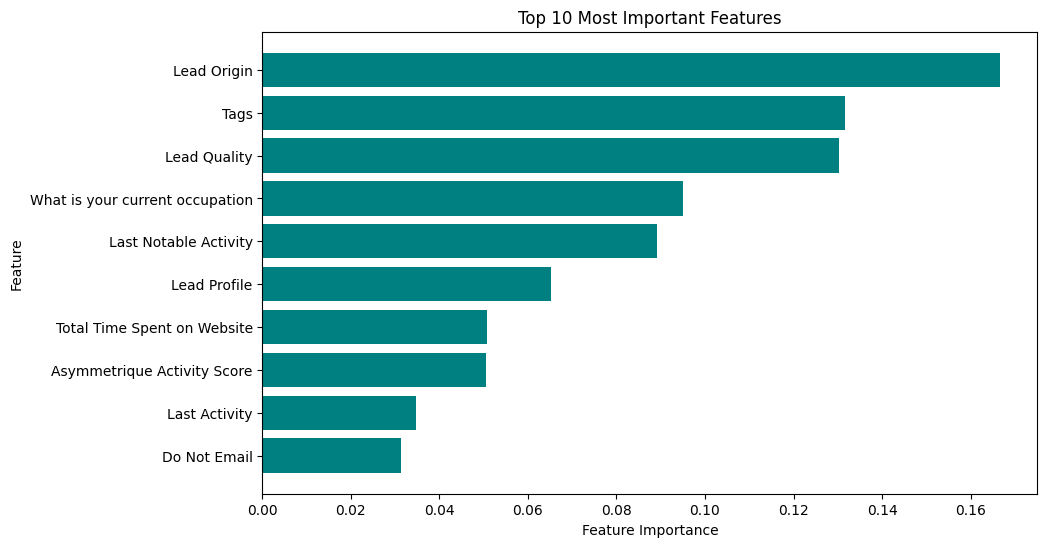

In [10]:
with open("best_model.pkl", "rb") as file:
    model = pickle.load(file)

feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx][-10:], feature_importance[sorted_idx][-10:], color="teal")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 10 Most Important Features")
plt.show()

In [17]:
!pip install fastapi uvicorn numpy pandas scikit-learn xgboost matplotlib seaborn
!pip install elevenlabs==0.2.26

In [30]:
!pip install fastapi uvicorn
!nohup uvicorn main:app --host 0.0.0.0 --port 8000 --reload &

nohup: appending output to 'nohup.out'


In [31]:
!tail -f nohup.out

INFO:     Will watch for changes in these directories: ['/content']
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)
INFO:     Started reloader process [5122] using StatReload
ERROR:    Error loading ASGI app. Could not import module "main".
http://0.0.0.0:8000/docs
^C


In [32]:
!ls

 best_model.pkl  'Lead Scoring.csv.zip'   lead_scoring_data   nohup.out   sample_data


In [33]:
%%writefile main.py
from fastapi import FastAPI
import pickle
import numpy as np

with open("best_model.pkl", "rb") as file:
    model = pickle.load(file)

app = FastAPI()

@app.get("/")
def home():
    return {"message": "Welcome to AI Lead Scoring API!"}

@app.post("/predict/")
def predict_lead_score(data: dict):
    try:
        features = np.array(data["features"]).reshape(1, -1)
        prediction = model.predict(features)[0]
        return {"lead_conversion_probability": int(prediction)}
    except Exception as e:
        return {"error": str(e)}

Writing main.py


In [38]:
!nohup uvicorn main:app --host 0.0.0.0 --port 8000 --reload &

nohup: appending output to 'nohup.out'


In [36]:
!pip install pyngrok
!ngrok authtoken 2uirpRrgxPpQRGPIkq7sDvnoZcj_6oZVBq88jwQBYbgax943a

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [50]:
from pyngrok import ngrok

public_url = ngrok.connect(8000)

print("API is now public!")
print(f"Public URL: {public_url}")


API is now public!
Public URL: NgrokTunnel: "https://6943-34-16-154-217.ngrok-free.app" -> "http://localhost:8000"


In [56]:
from elevenlabs import generate, play, save, set_api_key

set_api_key("sk_ca0fd40f6ff3f369edafe7f907fa81b2a5a92d073fb22914")

def voice_feedback(prediction):
    text = f"The lead conversion probability is {prediction * 100:.1f} percent."
    audio = generate(text=text, voice="Aria", model="eleven_multilingual_v2")
    save(audio, "lead_scoring_feedback.mp3")
    play(audio)

voice_feedback(0.94)

In [57]:
!ls
from google.colab import files
files.download("lead_scoring_feedback.mp3")

 best_model.pkl		     lead_scoring_data		 nohup.out
'Lead Scoring.csv (1).zip'   lead_scoring_feedback.mp3	 __pycache__
'Lead Scoring.csv.zip'	     main.py			 sample_data


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [58]:
from IPython.display import Audio

audio_file = "lead_scoring_feedback.mp3"
Audio(audio_file)